In [3]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from itertools import product

# import sys
# sys.path.append('../funcs')
# from taus import decorrelation_temporal_model, fit_coh_decay_model

In [8]:
dss = {fp.stem: xr.open_dataset(fp) for fp in sorted(list(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar').glob('*.nc')))}

home_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/')
fig_dir = home_dir.joinpath('figures', 'examples')

/Users/rdcrlzh1/miniforge3/envs/coherence/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rdcrlzh1/miniforge3/envs/coherence/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rdcrlzh1/miniforge3/envs/coherence/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rdcrlzh1/miniforge3/envs/coherence/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rdcrlzh1/miniforge3/envs/coherence/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedo

KeyboardInterrupt: 

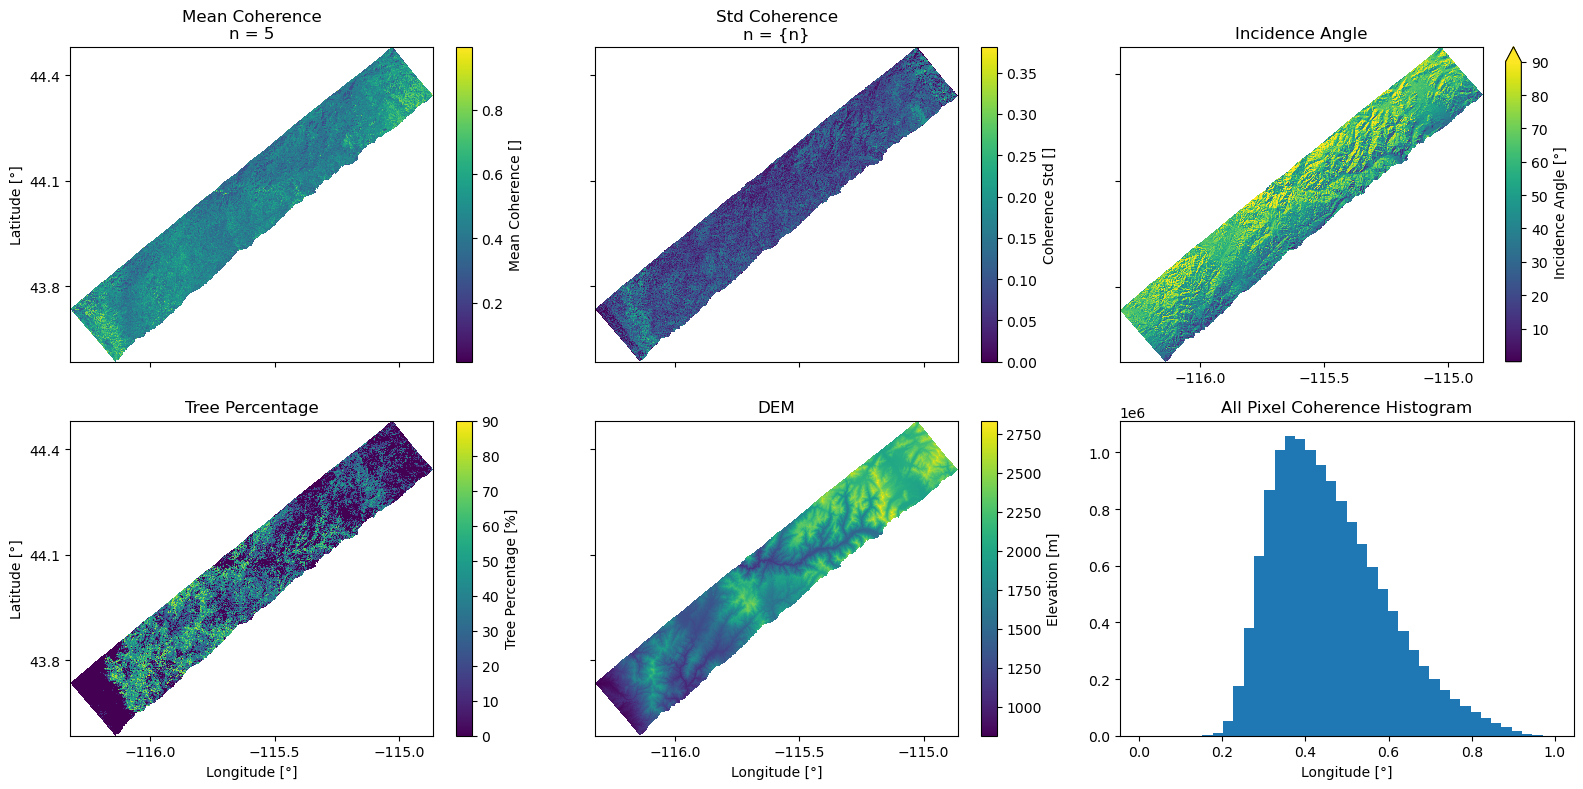

In [77]:
for stem, ds_full in dss.items():
    for heading in ds_full.heading.values:
        # if stem != 'stlake_full': continue
        fig, axes = plt.subplots(2, 3, figsize = (16,8))
        axr = axes.ravel()
        ds = ds_full.sel(pol = 'HH', heading = heading)
        from itertools import product
        n = 0
        for t1, t2 in product(ds.time1, ds.time2):
            if (~ds['cor'].sel(time1 = t1, time2 = t2).isnull()).sum() == 0: continue
            n += 1

        ds['cor'].mean(dim = ['time1', 'time2']).dropna('y', how = 'all').plot(ax = axr[0], cbar_kwargs={'label':'Mean Coherence []'})
        bds = ds['cor'].mean(dim = ['time1', 'time2']).dropna('y', how = 'all')
        axr[0].set_title(f'Mean Coherence\nn = {n}')

        ds['cor'].std(dim = ['time1', 'time2']).dropna('y', how = 'all').plot(ax = axr[1], cbar_kwargs={'label':'Coherence Std []'})
        axr[1].set_title(f'Std Coherence\nn = {n}')

        np.rad2deg(ds['inc']).dropna('y', how = 'all').plot(ax = axr[2], vmax = 90, cbar_kwargs={'label':'Incidence Angle [°]'})
        axr[2].set_title('Incidence Angle')

        ds['tree_perc'].where(~bds.isnull()).dropna('y', how = 'all').plot(ax = axr[3], cbar_kwargs={'label':'Tree Percentage [%]'})
        axr[3].set_title('Tree Percentage')

        ds['dem'].where(~bds.isnull()).dropna('y', how = 'all').plot(ax = axr[4], cbar_kwargs={'label':'Elevation [m]'})
        axr[4].set_title('DEM')

        ds['cor'].plot.hist(bins = 40, ax= axr[5], density = False)
        axr[5].set_title('All Pixel Coherence Histogram')

        for ax in axes.ravel()[:-1]:
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.xaxis.set_major_locator(plt.MaxNLocator(3))
            ax.yaxis.set_major_locator(plt.MaxNLocator(3))


        for ax in axes[:, 0]:
            ax.set_ylabel('Latitude [°]')
        for ax in axes[-1, :]:
            ax.set_xlabel('Longitude [°]')
        
        for ax in axes[:, 1].ravel(): ax.set_yticklabels([])
        axes[0, 2].set_yticklabels([])
        for ax in axes[0, :-1].ravel(): ax.set_xticklabels([])

        axes[1, 2].ticklabel_format(axis = 'y', style = 'sci', scilimits=(0,0))


        plt.tight_layout()
        fig.savefig(fig_dir.joinpath(stem.replace('_full', f'_{heading}') + '_ex.png'))
        plt.close(fig)
